In [1]:
import numpy as np
import pandas as pd

np.random.seed(23) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)
df = df.sample(40)


In [2]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [3]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='feature1',
    y='feature2',
    z='feature3',
    color=df['target'].astype(str),  # Convert target to string for color separation
)

fig.update_traces(
    marker=dict(
        size=12,
        line=dict(width=2, color='DarkSlateGrey')
    ),
    selector=dict(mode='markers')
)

fig.show()


In [4]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [5]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [6]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [7]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [8]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

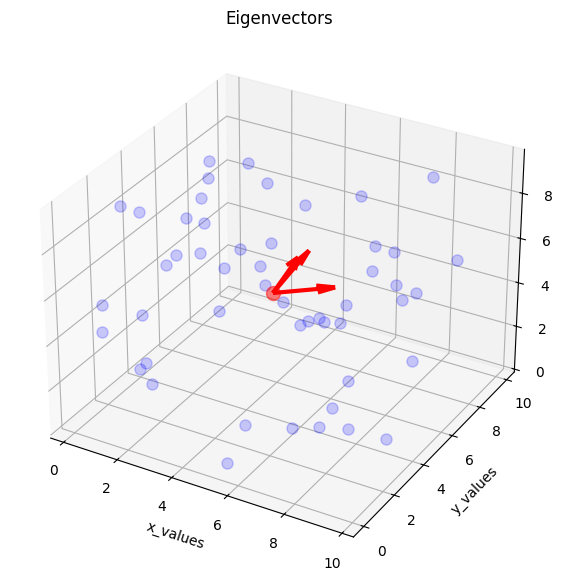

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Dummy Data (Replace with your actual df, feature names, and eigen_vectors) ---
# Assuming 'df' is a pandas DataFrame or similar structure
# and 'eigen_vectors' is a NumPy array.
# You need to define df and eigen_vectors for this code to run.
# For demonstration purposes, let's create some dummy data:
np.random.seed(42)
num_points = 50
df = {
    'feature1': np.random.rand(num_points) * 10,
    'feature2': np.random.rand(num_points) * 10,
    'feature3': np.random.rand(num_points) * 10,
}
# Convert to a DataFrame for easier handling if it's not already
import pandas as pd
df = pd.DataFrame(df)

# Calculate mean (origin of eigenvectors)
mean_feature1 = df['feature1'].mean()
mean_feature2 = df['feature2'].mean()
mean_feature3 = df['feature3'].mean()

# Dummy eigenvectors (replace with your actual calculated eigenvectors)
# These should be 3D vectors. For example, if you have 3 principal components,
# eigen_vectors would be a 3x3 matrix where each row or column is a vector.
# Let's assume eigen_vectors.T gives you the vectors as columns (v[0], v[1], v[2])
eigen_vectors = np.array([
    [1.0, 0.5, 0.2],
    [0.3, 1.2, 0.8],
    [0.7, 0.1, 1.5]
])
# Normalize these dummy vectors for better visualization if they are too long/short
eigen_vectors = eigen_vectors / np.linalg.norm(eigen_vectors, axis=1)[:, np.newaxis]
# --- End of Dummy Data ---


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)

# Plot the mean point
ax.plot([mean_feature1], [mean_feature2], [mean_feature3], 'o', markersize=10, color='red', alpha=0.5)

# Plot eigenvectors using ax.quiver
# ax.quiver(x_origin, y_origin, z_origin, u_vector, v_vector, w_vector, ...)
# For each eigenvector 'v', the origin is the mean, and the vector components are v[0], v[1], v[2]
for v in eigen_vectors: # Assuming eigen_vectors now has vectors as rows
    ax.quiver(mean_feature1, mean_feature2, mean_feature3,
              v[0], v[1], v[2],
              color="r", length=np.linalg.norm(v) * 2,  # Adjust length as needed for visibility
              arrow_length_ratio=0.3, # Adjust arrow head size relative to arrow length
              linewidth=3)

# If your eigen_vectors are columns (as in `eigen_vectors.T` in your original code),
# then loop like this:
# for v_col in eigen_vectors.T:
#     ax.quiver(mean_feature1, mean_feature2, mean_feature3,
#               v_col[0], v_col[1], v_col[2],
#               color="r", length=np.linalg.norm(v_col) * 2,
#               arrow_length_ratio=0.3,
#               linewidth=3)


ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [15]:
pc = eigen_vectors[0:2]
pc

array([[0.88045091, 0.44022545, 0.17609018],
       [0.20365327, 0.81461308, 0.54307539]])

In [19]:
# Perform PCA transformation
transformed_df = np.dot(df.iloc[:, 0:3], pc.T)  # shape: (n_samples, 3) x (3, 2)

# Create DataFrame with principal components
new_df = pd.DataFrame(transformed_df, columns=['PC1', 'PC2'])

# Try adding target column from df, or fallback to 'y' if available
try:
    new_df['target'] = df['target'].values
except KeyError:
    try:
        new_df['target'] = y  # Make sure 'y' exists in your environment
        print("✅ Added target from external 'y' variable.")
    except NameError:
        new_df['target'] = np.random.randint(0, 2, size=new_df.shape[0])
        print("⚠️ 'target' column not found. Added dummy target values for testing.")

# Show result
print(new_df.head())


⚠️ 'target' column not found. Added dummy target values for testing.
         PC1        PC2  target
0   7.621344   8.831811       0
1  12.903561  11.706682       0
2  11.134311  10.851201       0
3  10.105695  11.270490       1
4   5.603911  10.117079       1


In [20]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()